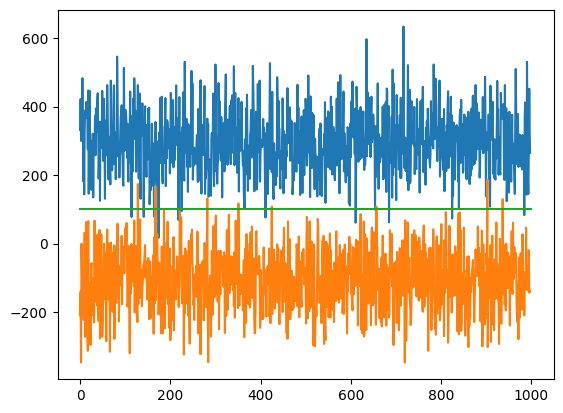

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('classify_ldiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [100, 100])
plt.show()

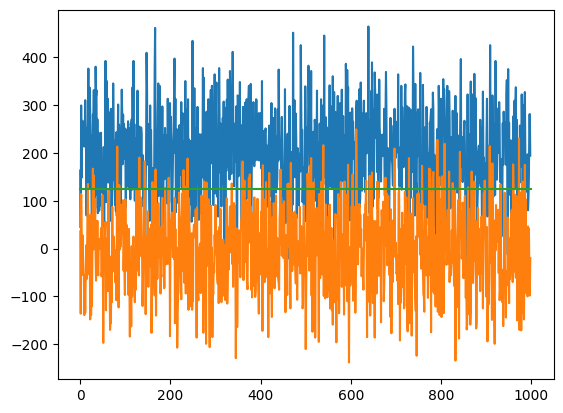

In [ ]:
df = pd.read_csv('classify_sdiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [125, 125])
plt.show()

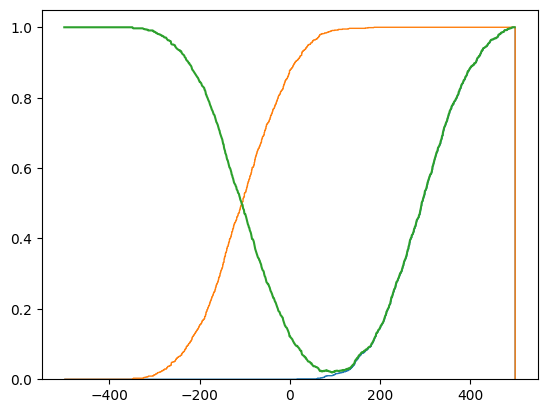

93.5935935935936


In [ ]:
import numpy as np

df = pd.read_csv('classify_ldiff.dat', sep='\t')
df.columns = [0, 1]

bins = np.linspace(-500, 500, 1000)
r = plt.hist(df[0], bins=bins, histtype='step', density=True, cumulative=True)
Fjed = r[0]
r = plt.hist(df[1], bins=bins, histtype='step', density=True, cumulative=True)
Fsit = r[0]
plt.plot(bins[:-1], Fjed+1-Fsit)
plt.show()

print(bins[np.argmin(Fjed+1-Fsit)])

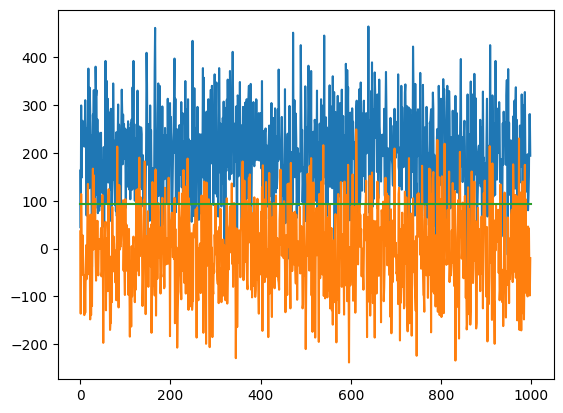

In [ ]:
df = pd.read_csv('classify_sdiff.dat', sep='\t')
df.columns = [0, 1]

plt.plot(df[0])
plt.plot(df[1])
plt.plot([0, 1000], [93, 93])
plt.show()

In [ ]:
# найти столбец у которого вероятность
# наиболее сильно отличается от полной

f = open('binary_rules.dat')
d = []
for s in f:
  d.append([int(x) for x in s.split()])
d = np.array(d)
X = d[:, :-1]
Y = d[:, -1]
p0 = Y[Y==1].shape[0] / Y.shape[0]
result = []
for i in range(5):
  Y2 = Y[X[:, i] == 1]
  pYX = Y2[Y2 == 1].shape[0] /Y2.shape[0]
  result.append(pYX)

print(result, p0)
t = Y[X[: ,2] == 0]
print(t.mean())

d1 = d[X[: ,2] == 1]

X2 = X[X[: ,2] == 1]
Y2 = Y[X[: ,2] == 1]
result2 = []
p0 = Y2[Y2==1].shape[0] / Y2.shape[0]
for i in range(5):
  Y3 = Y2[X2[:, i] == 1]
  pYX = Y3[Y3 == 1].shape[0] /Y3.shape[0]
  result2.append(pYX)

print(result2, p0)

t = (Y2[X2[: ,3]==1])
print(t.mean())

[0.22964509394572025, 0.2556701030927835, 0.5, 0.4959514170040486, 0.26260504201680673] 0.245
0.0
[0.497737556561086, 0.5166666666666667, 0.5, 1.0, 0.508130081300813] 0.5
1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

f = open('binary_rules.dat')
d = []
for l in f:
  d.append([float(x) for x in l.split()])
d = np.array(d)

x = d[:, :-1]
y = d[:, -1]
clf = DecisionTreeClassifier()
clf.fit(x, y)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mytree")

'mytree.pdf'